<h3>Inicialização</h3>

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h3>Funções Auxiliares</h3>

In [2]:
# image entropy
def calcEntropy(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist = hist.ravel()/hist.sum()
    logs = np.log2(hist+0.00001)
    entropy = -1 * (hist*logs).sum()

    return entropy

In [3]:
# huffman
from heapq import heappush, heappop, heapify
from collections import defaultdict

def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

<h3>Compressão Psicovisual</h3>

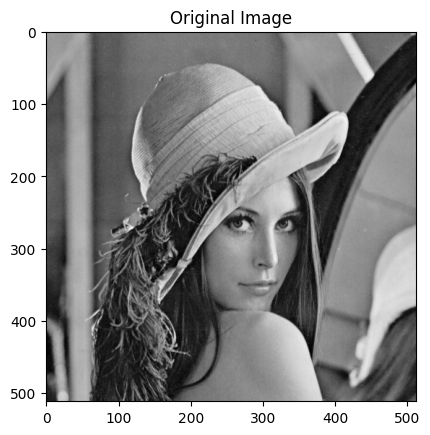

entropy: 7.442465782165527


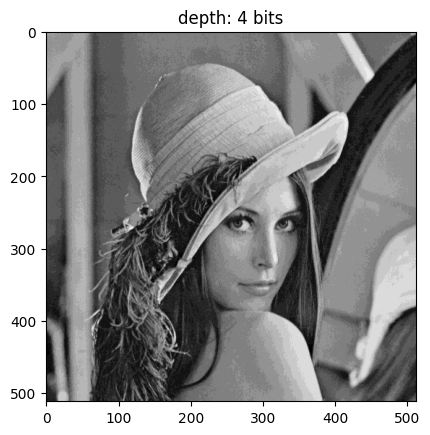

entropy: 3.4924070835113525


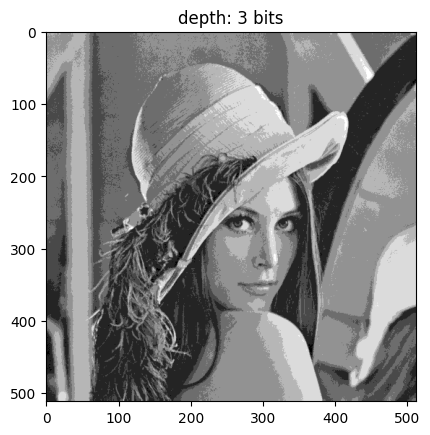

entropy: 2.5114169120788574


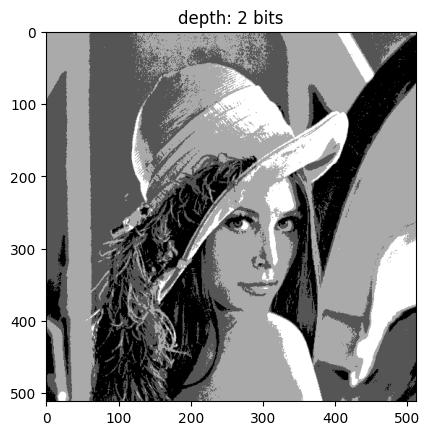

entropy: 1.798621654510498


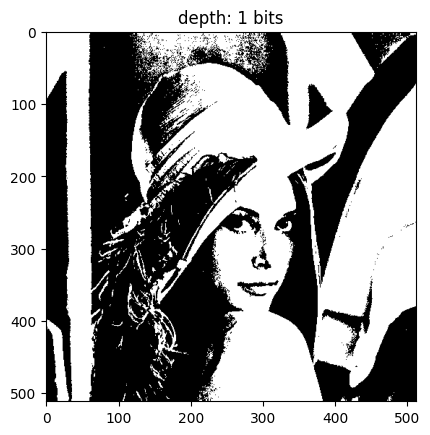

entropy: 0.9996111392974854


In [4]:
# original
img1 = cv2.imread('lena512.pgm',0)
plt.title('Original Image')
plt.imshow(img1, cmap = 'gray')
plt.show()
print ('entropy:', calcEntropy(img1))
calcEntropy(img1)

# 4 bits
img2 = img1 & 0xf0
plt.title('depth: 4 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print ('entropy:', calcEntropy(img2))
calcEntropy(img2)

# 3 bits
img2 = img1 & 0xe0
plt.title('depth: 3 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print ('entropy:', calcEntropy(img2))

# 2 bits
img2 = img1 & 0xc0
plt.title('depth: 2 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print ('entropy:', calcEntropy(img2))
calcEntropy(img2)

# 1 bits
img2 = img1 & 0x80
plt.title('depth: 1 bits')
plt.imshow(img2, cmap = 'gray')
plt.show()
print ('entropy:', calcEntropy(img2))

<h3>Entropia</h3>

7.442465782165527 5.593921661376953


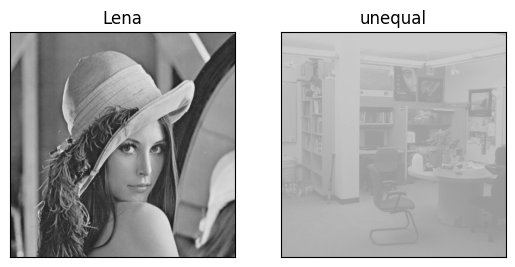

In [5]:
img1 = cv2.imread('lena512.pgm',0)
img2 = cv2.imread('unequal.png',0)

en1 = calcEntropy(img1)
en2 = calcEntropy(img2)

print (en1, en2)

plt.subplot(121),plt.imshow(img1, cmap = 'gray', clim=(0, 255))
plt.title('Lena'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray', clim=(0, 255))
plt.title('unequal'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>Compressão por Redundância de Código - Huffman</h3>

Symbol	Weight		Huffman Code
203	0.069294	1010
159	0.024069	00101
162	0.022075	00000
167	0.022862	00010
174	0.023425	00011
175	0.023794	00100
176	0.027569	01011
177	0.030406	10000
178	0.027213	01000
179	0.025506	00110
180	0.022181	00001
181	0.027300	01001
154	0.014837	011101
156	0.014450	011010
157	0.014900	011111
158	0.017344	101110
160	0.021063	111100
161	0.021650	111111
163	0.019912	110111
164	0.020794	111010
165	0.019975	111000
166	0.019656	110110
168	0.018887	110010
169	0.019125	110100
170	0.018894	110011
171	0.020006	111001
172	0.021619	111110
173	0.021163	111101
182	0.021044	111011
183	0.017331	101101
184	0.016294	100111
185	0.018550	110000
186	0.018706	110001
187	0.017494	101111
188	0.017181	101100
189	0.016031	100110
190	0.014656	011011
191	0.014881	011110
192	0.013919	011001
193	0.013875	011000
194	0.015888	100101
195	0.015681	100011
196	0.015875	100100
197	0.014694	011100
198	0.013494	010100
199	0.013819	010101
200	0.015075	100010
202	0.013081	001110
153	0.007838	0011111
155	

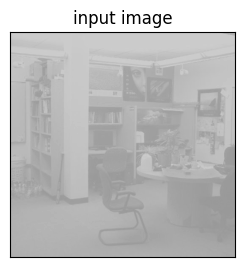

In [8]:
# load image
img1 = cv2.imread('unequal.png',0)
#img1 = cv2.imread('lena512.pgm',0)
#img1 = cv2.imread('200_s.pgm',0)
#img1 = cv2.imread('chessboard.jpg',0)

height, width =  img1.shape
entimg1 = calcEntropy(img1)

# compute histogram
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
hist = hist.ravel()/hist.sum()

symb2freq = defaultdict(float)
for i in range(0,256):
    symb2freq[i] = hist[i]
    
#print symb2freq

# enconde
huff = encode(symb2freq)

print ("Symbol\tWeight\t\tHuffman Code")
for p in huff:
    if (symb2freq[p[0]] > 0):
        print ("%d\t%f\t%s" % (p[0], symb2freq[p[0]], p[1]))
    
nbits = 0
for i in range(0,256):
    nbits += len(huff[i][1]) * hist[huff[i][0]] * height * width
    
# bits per pixel
bpp = nbits / (height * width)
     
print ("\nSummary:")    
print ("Image entropy: %5.3f" % entimg1)
print ("size: %d bytes" % (nbits / 8))
print ("%5.3f bits/pixel" % bpp)
print ("code efficiency: %5.3f" % (entimg1/bpp))
print ("Compression ratio (without header): %5.3f" % (8/bpp))

plt.subplot(121),plt.imshow(img1, cmap = 'gray', clim=(0, 255))
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# compression with a random image

# generate the input random image
size = 200, 200
img1 = np.zeros(size, dtype=np.uint8)
# min and max grayvalues
minV = 0
maxV = 15 # 2, 15, 63
img1 = cv2.randu(img1, minV, maxV+1)

height, width =  img1.shape
entimg1 = calcEntropy(img1)

# compute histogram
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
hist = hist.ravel()/hist.sum()

symb2freq = defaultdict(float)
for i in range(0,256):
    symb2freq[i] = hist[i]
    
# enconde
huff = encode(symb2freq)    

nbits = 0
for i in range(0,256):
    nbits += len(huff[i][1]) * hist[huff[i][0]] * height * width
    
# bits per pixel
bpp = nbits / (height * width)
     
print ("\nSummary:")    
print ("Image entropy: %5.3f" % entimg1)
print ("size: %d bytes" % (nbits / 8))
print ("%5.3f bits/pixel" % bpp)
print ("code efficiency: %5.3f" % (entimg1/bpp))
print ("Compression ratio (without header): %5.3f" % (8/bpp))

print ("\nHuffman code\nSymbol\tWeight\t\tHuffman Code")
for p in huff:
    if (symb2freq[p[0]] > 0):
        print "%d\t%f\t%s" % (p[0], symb2freq[p[0]], p[1])
        
plt.imshow(img1, cmap = 'gray', clim=(minV, maxV))
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.show()

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (1223968459.py, line 42)